In [ ]:
# !sudo apt install tesseract-ocr
# !pip install pytesseract
# !pip install cryptography

## Detection

In [1]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

In [2]:
import cv2
import json
from PIL import Image
import pytesseract
from aadhar_pan_extractor import Pan_Info_Extractor,Aadhar_Info_Extractor

c:\Users\Pratham\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Convert image to grey scale

In [3]:
image_file = "Test_Sample.jpg"
# image_file = "aanti.jpg"
image = cv2.imread(image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
image = cv2.GaussianBlur(
 src=image,
 ksize=(3, 3),
 sigmaX=0,
 sigmaY=0)

In [5]:
cv2.imwrite("KB.jpg",image)
# cv2.imwrite("aanti_grey.jpg",image)

True

### PyTessaract OCR

In [6]:
no_noise = "KB.jpg"
# no_noise = "aanti_grey.jpg"

In [7]:
import pytesseract
print(pytesseract.image_to_string(no_noise, lang='eng'))

BNW HAs

Government of India ¢
AISA ATA
NAJMA KHATUN
Prot: aa mat fier
Father : UMMAR ALI MIYA
ST HF / Year of Birth : 1994
af / Female

4072 6523 3592




In [8]:
import pandas as pd
data_result =pytesseract.image_to_data(
    no_noise,
    output_type=pytesseract.Output.DATAFRAME,
    lang='eng')
data_result.head(75)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1200,675,-1.000000,NaN
1,2,1,1,0,0,0,117,0,101,187,-1.000000,NaN
2,3,1,1,1,0,0,117,0,101,187,-1.000000,NaN
3,4,1,1,1,1,0,172,0,46,32,-1.000000,NaN
4,5,1,1,1,1,1,172,0,46,32,95.000000,
...,...,...,...,...,...,...,...,...,...,...,...,...
70,5,1,5,1,1,1,451,510,95,40,92.834084,4072
71,5,1,5,1,1,2,573,508,91,39,92.834084,6523
72,5,1,5,1,1,3,690,505,88,40,96.553596,3592
73,2,1,6,0,0,0,94,483,1106,192,-1.000000,NaN


In [9]:
# Test_sample
x1 = 451
y1 = 510
x2 = 690 + 88
y2 = 505 + 40
extractor = Aadhar_Info_Extractor()

In [10]:
# aanti
# x1 = 305
# y1 = 516
# x2 = 414 + 48
# y2 = 516 + 26
# extractor = Aadhar_Info_Extractor()

In [11]:
data_1=extractor.info_extractor('KB.jpg')
# data_1=extractor.info_extractor('aanti.jpg')
data_1

'{"Aadhar_number": "4072 6523 3592", "Name": null, "Gender": "Female", "DOB": "1994", "Address": "NAN"}'

In [12]:
data_2=  json.loads(data_1)
data_2

{'Aadhar_number': '4072 6523 3592',
 'Name': None,
 'Gender': 'Female',
 'DOB': '1994',
 'Address': 'NAN'}

In [13]:
a_nubmer=data_2["Aadhar_number"]
a_nubmer

'4072 6523 3592'

## Cryptography

In [14]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
import base64

def generate_rsa_keypair():
    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048,
        backend=default_backend()
    )
    public_key = private_key.public_key()

    return private_key, public_key

def rsa_encrypt(message, public_key):
    ciphertext = public_key.encrypt(
        message.encode('utf-8'),
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return base64.b64encode(ciphertext).decode('utf-8')

def aes_encrypt(message, key):
    iv = b'0123456789abcdef'  # 16 bytes for AES-128
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(message.encode('utf-8')) + encryptor.finalize()
    return base64.b64encode(ciphertext).decode('utf-8')

# Example usage
private_key, public_key = generate_rsa_keypair()
aes_key = b'Sixteen byte key'  # 16 bytes for AES-128

message = a_nubmer

# RSA Encryption for AES Key Exchange
encrypted_aes_key = rsa_encrypt(aes_key.decode('utf-8'), public_key)

# AES Encryption for the actual data
encrypted_data = aes_encrypt(message, aes_key)

print("Encrypted AES Key:", encrypted_aes_key)
print("Encrypted Data:", encrypted_data)

Encrypted AES Key: KFJaq4geKuri9u8LH6r5Mjtz/ZD+Y5pIA2fxp+XhwaWNi4aRt0ECfVc7f/FX1SYBtiotaPoW4UlLhSUbnBT/kSi/HCZP6rySprAPRsyzdBZ/Uf2qn6kp1NSGeyUr5VX2PbohLNXjxJjB2hhqMR1w6bqbdzLJN0f8OwxzxqVDyQEeZmoQaXAm8v8A5KMeVUr2l67G6UlmTC4DVHuSOtCInbAfACBAyu6n76gjoldz3T0u50Y9dwt/24ZH1kHK+T3RGOlDqth/ZLfqhiuyRnLkv2Xp4FSGTtOb8x85m2Ai4XRARPlkmQlrvKDx6r6UTAvbr0u7cap8vAifvJ63iY7RoA==
Encrypted Data: dWL1w1sLPWrIIoy34ow=


## Replace

In [15]:
import pytesseract
# import shutil
# import os
# import random
try:
 from PIL import Image
except ImportError:
 import Image

In [16]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [17]:
# image3 = image_file
image3 = cv2.imread("C:\\Users\\Pratham\\Desktop\\Identity Resolver\\Test_Sample.jpg")#("/content/WhatsApp Image 2023-12-03 at 1.31.06 PM.jpeg")
# image3 = cv2.imread("C:\\Users\\Pratham\\Desktop\\Identity Resolver\\aanti.jpg")

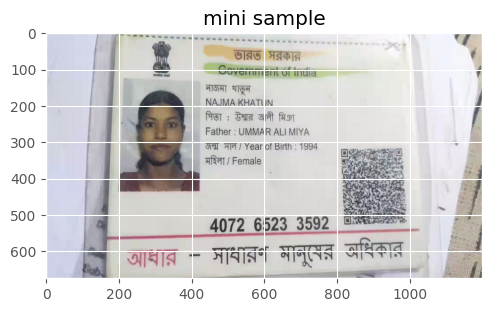

In [18]:
imshow("mini sample",image3)

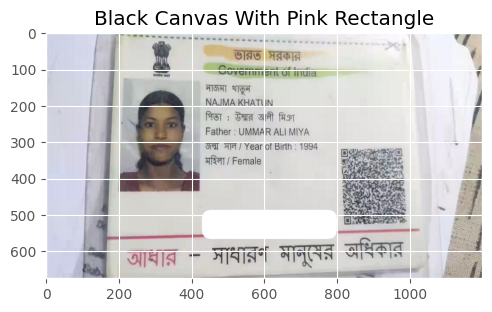

In [19]:
# cv2.rectangle(image3,  (440,495), (780,540), (255,255,255), 44)
cv2.rectangle(image3,  (x1,y1), (x2,y2), (255,255,255), 44)
imshow("Black Canvas With Pink Rectangle", image3)


In [20]:
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [21]:
text_size = 1
# text_size = 0.5

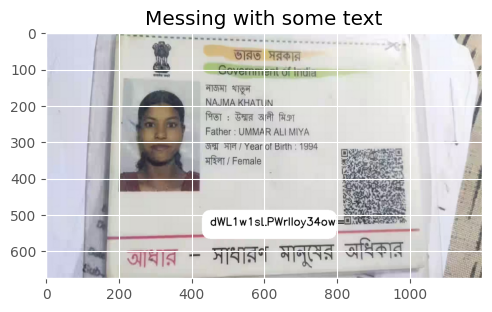

True

In [24]:
ourString =  encrypted_data
cv2.putText(image3, ourString, (x1,y1+20), cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,0,0), 2)
imshow("Messing with some text", image3)
cv2.imwrite("encry_image.jpg",image3)

## BLurring

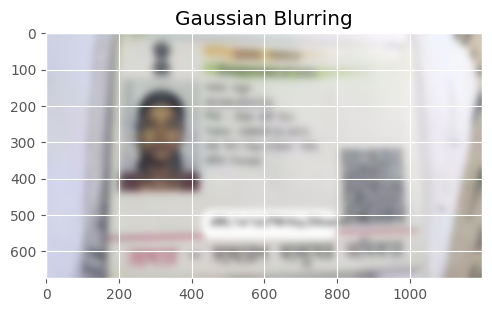

True

In [23]:
# from PIL import Image
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


#image = cv2.imread('/content/sample-aadhaar-card-800x445.png')
Gaussian = cv2.GaussianBlur(image3, (65,65), 0)
imshow('Gaussian Blurring', Gaussian)
cv2.imwrite("final_image.jpg",Gaussian)



In [30]:
# final_image= "final_image.jpg"
# cv2.imread(final_image)